# Problem 9.5

##### Initialisation

In [1]:
from scipy import signal
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

##### Parameters for the problem

In [2]:
c1 = 0.1 * 10**-6   # Farad
c2 = 0.1 * 10**-6   # Farad
l1 = 2.0 * 10**-6   # Henry
r1 = 0.5            # Ohm
r2 = 1.0            # Ohm

#### The State-space model

The matrisces are given by:
$$
\mathbb{A} = \left(
\begin{matrix}
0 & \frac{1}{C_1} & 0 \\
-\frac{1}{L} & -\frac{R_1}{L} & -\frac{1}{L} \\
0 & \frac{1}{C_2} & -\frac{1}{R_2 C_2}
\end{matrix}
\right),
\;
B = \left(
\begin{matrix}
0 \\ \frac{1}{L} \\ 0
\end{matrix}
\right),
\;
C = \left(
\begin{matrix}
0 & 0 & 1 \\
0 & 1 & 0 
\end{matrix}
\right),
\;
D = \left(
\begin{matrix}
0 \\ 0
\end{matrix}
\right).
$$

In [3]:
aa = np.array([[0, 1/c1, 0],[-1/l1, -r1/l1, -1/l1],[0, 1/c2, -1/(r2*c2)]])
bb = np.array([[0],[1/l1],[0]])
cc = np.array([[0, 1, 0],[0,0,1]])
dd = np.array([[0],[0]])
sys5 = signal.StateSpace(aa, bb, cc, dd)
print("System 5 in State-Space is: ",sys5)

System 5 in State-Space is:  StateSpaceContinuous(
array([[        0.,  10000000.,         0.],
       [  -500000.,   -250000.,   -500000.],
       [        0.,  10000000., -10000000.]]),
array([[     0.],
       [500000.],
       [     0.]]),
array([[0, 1, 0],
       [0, 0, 1]]),
array([[0],
       [0]]),
dt: None
)


##### Determine the dynamic behaviour of the system by calculating the eiven values of the A-Matrix.

In [4]:
eig5 = linalg.eigvals(aa)
print('The eigenvalues of the A-matrix are: ',eig5)

The eigenvalues of the A-matrix are:  [ -381017.75044638+2263771.12233432j  -381017.75044638-2263771.12233432j
 -9487964.49910723      +0.j        ]


##### Determine the Transfer Function and the ZerosPolesGain representation of the model.

A remark has te be made here. A tranformation of a State-space model to a transfer function model, results in an array of numerator polynomial coefficients (for all input-output combination one) and one array with the denominator polynomial coefficients. The implemtation for the calculation of poles, zeros and a ZerosPolesGain representation of the state-space model does not work correctly. Therefor, the tranfer function object is pulled appart in separate transferfunction models, reconstructed from the array's. 

In [5]:
tf5 = sys5.to_tf()
print('The transfer functions are: ',tf5)
tf5a=signal.TransferFunction(tf5.num[0],tf5.den)
print('The first transferfunction is: ',tf5a)
zpk5a = tf5a.to_zpk()
print('The ZerosPolesGain model of the first input is: ', zpk5a)
tf5b=signal.TransferFunction(tf5.num[1],tf5.den)
print('The second transferfunction is: ',tf5b)
zpk5b = tf5a.to_zpk()
print('The ZerosPolesGain model is: ', zpk5b)
#print(type(sys5))
zeros5 = tf5a.zeros
print('The zeros of the sytem are: ',zeros5)
poles5 = tf5a.poles
print('The poles of the sytem are: ',poles5)

The transfer functions are:  TransferFunctionContinuous(
array([[5.00000000e+05, 5.00000000e+12, 4.09600000e+04],
       [1.86264515e-09, 5.00000000e+12, 2.45760000e+04]]),
array([1.000e+00, 1.025e+07, 1.250e+13, 5.000e+19]),
dt: None
)
The first transferfunction is:  TransferFunctionContinuous(
array([5.000e+05, 5.000e+12, 4.096e+04]),
array([1.000e+00, 1.025e+07, 1.250e+13, 5.000e+19]),
dt: None
)
The ZerosPolesGain model of the first input is:  ZerosPolesGainContinuous(
array([-1.000e+07, -8.192e-09]),
array([-9487964.49910722      +0.j        ,
        -381017.75044638+2263771.12233432j,
        -381017.75044638-2263771.12233432j]),
500000.00000000186,
dt: None
)
The second transferfunction is:  TransferFunctionContinuous(
array([1.86264515e-09, 5.00000000e+12, 2.45760000e+04]),
array([1.000e+00, 1.025e+07, 1.250e+13, 5.000e+19]),
dt: None
)
The ZerosPolesGain model is:  ZerosPolesGainContinuous(
array([-1.000e+07, -8.192e-09]),
array([-9487964.49910722      +0.j        ,
        -

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


##### Bode-plots of the system

Bode plots of the system. They only differ in the output of the variables, which should only heve effect on the numerator of the transfer function (positive phase part).

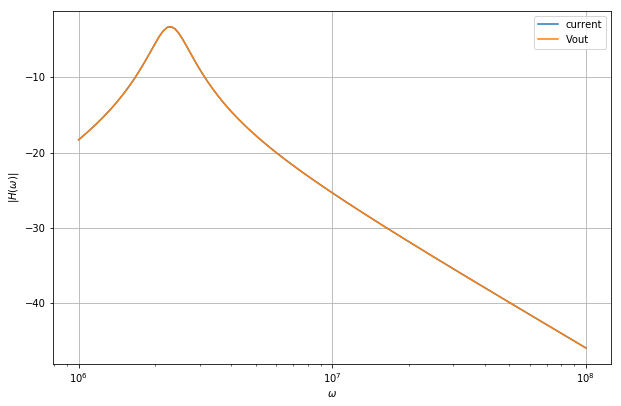

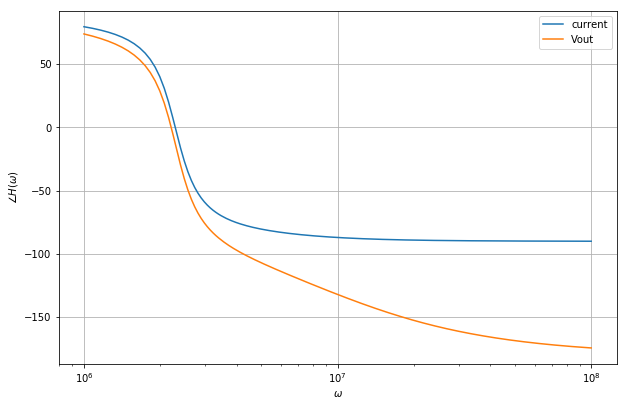

In [6]:
ws = np.linspace(10**6, 10**8, 1200)
wa, maga, phasea = tf5a.bode(ws)
wb, magb, phaseb = tf5b.bode(ws)
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, maga, label = 'current')    # Bode magnitude plot system 1
plt.semilogx(wa, maga, label = 'Vout')    # Bode magnitude plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.grid(True)
plt.legend()
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, phasea, label = 'current')  # Bode phase plot system 1
plt.semilogx(wb, phaseb, label = 'Vout')  # Bode phase plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()

##### Time-response to a unit step function

For an imput of a unit step function from 1 V to 2 V, we have to set the initial conditions for the state-space variables, and adjust the step: 2 V step. 

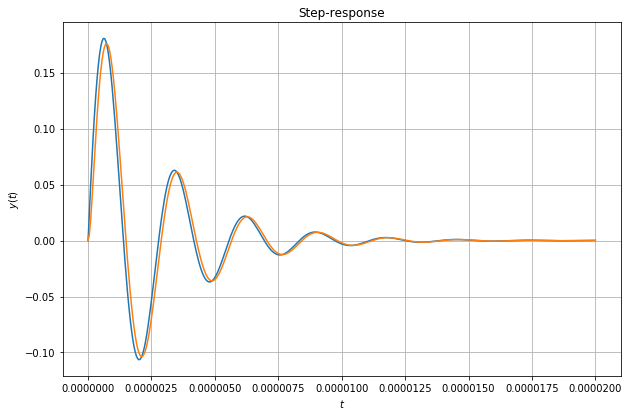

In [7]:
t5 = np.linspace(0, 2*10**-5, num=400)
u5 = 2*np.ones_like(t5)
init = [1, 0, 0]
tout5, y5, x5 = signal.lsim(sys5, u5, t5, X0=init)
plt.figure(figsize=(10,6.5))
plt.plot(t5, y5,label='step-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Step-response')
plt.grid(True)
plt.show()

There is a small phase lag of the output voltage with respect to the current. Note that ouptut voltage and current both start at zero an are also zero for the time to infinity. 